# Analysis

## Set-up data for the experiments

In [1]:
import os
import pandas as pd


datamatrixDf = pd.read_csv(os.environ['EICU_EHR_PIPELINE_BASE'] + '''/data/final/data_matrix.csv''')
datamatrixDf

,person_id,visit_occurrence_id,measurement_date,visit_start_date_adm,death_adm,vitals_systemic_mean_avg,vitals_systemic_diastolic_avg,vitals_systemic_systolic_avg,vitals_respiration_avg,vitals_heartrate_avg,...,labs_Red blood cell count_last,labs_Calcium level_last,labs_MCV - Mean corpuscular volume_last,labs_MCHC - Mean corpuscular haemoglobin concentration_last,labs_MCH - Mean corpuscular haemoglobin_last,labs_White blood cell count_last,labs_Red blood cell distribution width_last,labs_Glucose level_last,labs_Bicarbonate level_last,labs_Anion gap_last
0,248364,141515,2014-04-04,2014-04-04,0,65.344086,47.924731,105.265233,25.763066,89.777003,...,4.37,9.5,90.4,34.9,31.6,3.8,15.5,97.0,21.0,19.0
1,248364,141515,2014-04-05,2014-04-04,0,68.147368,51.291228,99.049123,23.763889,101.937500,...,3.29,7.6,92.1,34.3,31.6,10.0,16.7,154.0,21.0,14.0
2,248364,141515,2014-04-06,2014-04-04,0,78.180556,57.565972,111.343750,23.731707,109.117021,...,3.34,7.9,91.6,33.7,30.8,12.9,17.3,105.0,22.0,13.0
3,248364,141515,2014-04-07,2014-04-04,0,82.724739,57.696864,123.606272,33.772727,79.000000,...,3.14,8.2,91.4,33.8,30.9,11.7,17.0,123.0,22.0,12.0
4,248364,141515,2014-04-08,2014-04-04,0,75.000000,53.103306,114.359504,30.335664,81.479021,...,2.86,8.0,95.1,33.1,31.5,9.9,17.2,116.0,22.0,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56232,3521842,3352884,2014-01-29,2014-01-28,0,89.946929,66.934130,137.592436,19.909722,100.312500,...,3.37,8.1,92.0,35.0,32.0,14.4,13.7,62.0,19.0,6.0
56233,3521842,3352884,2014-01-30,2014-01-28,0,73.849266,50.696327,127.106241,21.030612,82.459184,...,3.32,7.8,92.0,35.0,33.0,11.4,14.1,98.0,21.0,3.0
56234,358073,3352922,2015-06-02,2015-06-01,0,78.000000,64.023256,97.302326,17.929821,77.197917,...,4.10,8.0,88.0,33.0,29.0,8.7,17.5,143.0,25.0,7.0
56235,358073,3352922,2015-06-03,2015-06-01,0,106.010242,78.054524,160.937190,19.117647,97.704861,...,3.80,8.5,87.0,33.0,29.0,6.9,17.4,159.0,25.0,7.0


### Raw data

In [2]:
datamatrixDf.to_csv(os.environ['EICU_EHR_PIPELINE_BASE'] + '/data/experiments/03_standardisation_analysis/datamatrix/data_matrix_original.csv', index=False)

### Standardised data with mean=0 and sd=1

In [3]:
non_data_cols = ['person_id', 'visit_occurrence_id', 'measurement_date', 'visit_start_date_adm', 'death_adm']
data_cols = datamatrixDf.columns[~datamatrixDf.columns.isin(non_data_cols)]

In [6]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(datamatrixDf[data_cols])
standardisedData = scaler.transform(datamatrixDf[data_cols])

standardisedDf = pd.concat([datamatrixDf[non_data_cols], pd.DataFrame(standardisedData, columns=data_cols)], axis=1)
standardisedDf

,person_id,visit_occurrence_id,measurement_date,visit_start_date_adm,death_adm,vitals_systemic_mean_avg,vitals_systemic_diastolic_avg,vitals_systemic_systolic_avg,vitals_respiration_avg,vitals_heartrate_avg,...,labs_Red blood cell count_last,labs_Calcium level_last,labs_MCV - Mean corpuscular volume_last,labs_MCHC - Mean corpuscular haemoglobin concentration_last,labs_MCH - Mean corpuscular haemoglobin_last,labs_White blood cell count_last,labs_Red blood cell distribution width_last,labs_Glucose level_last,labs_Bicarbonate level_last,labs_Anion gap_last
0,248364,141515,2014-04-04,2014-04-04,0,-1.215220,-1.145975,-1.287400,0.935071,-0.011671,...,1.723595,1.620130,-0.083150,1.589499,0.787073,-0.021781,-0.487047,-0.862585,-0.825928,1.967109
1,248364,141515,2014-04-05,2014-04-04,0,-1.021900,-0.850679,-1.638015,0.543885,0.756100,...,-0.010707,-0.743180,0.164955,1.162001,0.787073,-0.018980,-0.036231,0.081173,-0.825928,0.817938
2,248364,141515,2014-04-06,2014-04-04,0,-0.329992,-0.300282,-0.944547,0.537588,1.209390,...,0.069584,-0.370026,0.091983,0.734502,0.462091,-0.017669,0.189176,-0.730127,-0.631947,0.588103
3,248364,141515,2014-04-07,2014-04-04,0,-0.016616,-0.288801,-0.252889,2.502350,-0.692093,...,-0.251583,0.003128,0.062794,0.805751,0.502714,-0.018211,0.076472,-0.432098,-0.631947,0.358269
4,248364,141515,2014-04-08,2014-04-04,0,-0.549329,-0.691730,-0.774446,1.829808,-0.535576,...,-0.701217,-0.245641,0.602787,0.307003,0.746450,-0.019025,0.151608,-0.547999,-0.631947,0.817938
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56232,3521842,3352884,2014-01-29,2014-01-28,0,0.481440,0.521457,0.535989,-0.210273,0.653503,...,0.117759,-0.121257,0.150361,1.660749,0.949564,-0.016991,-1.163270,-1.442085,-1.213889,-1.020736
56233,3521842,3352884,2014-01-30,2014-01-28,0,-0.628686,-0.902861,-0.055476,0.009055,-0.473692,...,0.037468,-0.494411,0.150361,1.660749,1.355791,-0.018347,-1.012999,-0.846027,-0.825928,-1.710238
56234,358073,3352922,2015-06-02,2015-06-01,0,-0.342444,0.266126,-1.736542,-0.597687,-0.805870,...,1.290020,-0.245641,-0.433415,0.235753,-0.269117,-0.019567,0.264312,-0.100955,-0.050005,-0.790902
56235,358073,3352922,2015-06-03,2015-06-01,0,1.589197,1.496895,1.852731,-0.365261,0.488866,...,0.808269,0.376282,-0.579359,0.235753,-0.269117,-0.020380,0.226744,0.163959,-0.050005,-0.790902


In [7]:
standardisedDf.to_csv(os.environ['EICU_EHR_PIPELINE_BASE'] + '/data/experiments/03_standardisation_analysis/datamatrix/data_matrix_standardised.csv', index=False)

### MinMax Scaling with min=0 and max=1

In [8]:
non_data_cols = ['person_id', 'visit_occurrence_id', 'measurement_date', 'visit_start_date_adm', 'death_adm']
data_cols = datamatrixDf.columns[~datamatrixDf.columns.isin(non_data_cols)]

In [11]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(datamatrixDf[data_cols])
scaledData = scaler.transform(datamatrixDf[data_cols])

scaledDf = pd.concat([datamatrixDf[non_data_cols], pd.DataFrame(scaledData, columns=data_cols)], axis=1)
scaledDf

,person_id,visit_occurrence_id,measurement_date,visit_start_date_adm,death_adm,vitals_systemic_mean_avg,vitals_systemic_diastolic_avg,vitals_systemic_systolic_avg,vitals_respiration_avg,vitals_heartrate_avg,...,labs_Red blood cell count_last,labs_Calcium level_last,labs_MCV - Mean corpuscular volume_last,labs_MCHC - Mean corpuscular haemoglobin concentration_last,labs_MCH - Mean corpuscular haemoglobin_last,labs_White blood cell count_last,labs_Red blood cell distribution width_last,labs_Glucose level_last,labs_Bicarbonate level_last,labs_Anion gap_last
0,248364,141515,2014-04-04,2014-04-04,0,0.254952,0.421589,0.469407,0.352065,0.438442,...,0.596190,0.398551,0.435443,0.614907,0.530534,0.000013,0.182568,0.047264,0.313725,0.395833
1,248364,141515,2014-04-05,2014-04-04,0,0.263251,0.443450,0.438052,0.324745,0.532803,...,0.390476,0.260870,0.456962,0.577640,0.530534,0.000035,0.196702,0.075622,0.313725,0.291667
2,248364,141515,2014-04-06,2014-04-04,0,0.292955,0.484195,0.500068,0.324305,0.588513,...,0.400000,0.282609,0.450633,0.540373,0.500000,0.000045,0.203769,0.051244,0.333333,0.270833
3,248364,141515,2014-04-07,2014-04-04,0,0.306409,0.485045,0.561922,0.461521,0.354817,...,0.361905,0.304348,0.448101,0.546584,0.503817,0.000041,0.200236,0.060199,0.333333,0.250000
4,248364,141515,2014-04-08,2014-04-04,0,0.283539,0.455216,0.515280,0.414551,0.374053,...,0.308571,0.289855,0.494937,0.503106,0.526718,0.000034,0.202591,0.056716,0.333333,0.291667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56232,3521842,3352884,2014-01-29,2014-01-28,0,0.327791,0.545027,0.632471,0.272076,0.520193,...,0.405714,0.297101,0.455696,0.621118,0.545802,0.000050,0.161366,0.029851,0.274510,0.125000
56233,3521842,3352884,2014-01-30,2014-01-28,0,0.280132,0.439587,0.579577,0.287393,0.381659,...,0.396190,0.275362,0.455696,0.621118,0.583969,0.000040,0.166078,0.047761,0.313725,0.062500
56234,358073,3352922,2015-06-02,2015-06-01,0,0.292421,0.526125,0.429241,0.245020,0.340834,...,0.544762,0.289855,0.405063,0.496894,0.431298,0.000030,0.206125,0.070149,0.392157,0.145833
56235,358073,3352922,2015-06-03,2015-06-01,0,0.375348,0.617237,0.750225,0.261252,0.499959,...,0.487619,0.326087,0.392405,0.496894,0.431298,0.000024,0.204947,0.078109,0.392157,0.145833


In [12]:
scaledDf.to_csv(os.environ['EICU_EHR_PIPELINE_BASE'] + '/data/experiments/03_standardisation_analysis/datamatrix/data_matrix_scaled.csv', index=False)

## Run the analysis

In [4]:
import os


for file in ['data_matrix_original.csv', 'data_matrix_standardised.csv', 'data_matrix_scaled.csv']:
        print('File: ' + str(file))
        os.system(
            'cd ' + os.environ['EHR_ML_BASE'] + ';'
            +
            '''.venv/bin/python -m ehrml.predict_mortality.Evaluate ''' + os.environ['EICU_EHR_PIPELINE_BASE'] + '''/data/experiments/03_standardisation_analysis/datamatrix/''' + file + ''' -tc "death_adm" -ic "person_id" "visit_occurrence_id" -mdc "measurement_date" -adc "visit_start_date_adm" -wb ''' + str(0) + ''' -wa ''' + str(3) + ''' -sp ''' + os.environ['EICU_EHR_PIPELINE_BASE'] + '''/data/experiments/03_standardisation_analysis/results/''' + file.split('.')[0] + '''.json;'''
            )


windowBefore: 0windowAfter: 1
2023-11-29 14:51:24,029 - EHR-ML - INFO - Parsing command line arguments
2023-11-29 14:51:24,030 - EHR-ML - INFO - args.data_file: /home/yram0006/phd/chapter_2/workspace/MIMIC-EHR-Pipeline/data/sepsis_icd_cohort/final/data_matrix.csv
2023-11-29 14:51:24,030 - EHR-ML - INFO - args.target_column: death_0_7_adm
2023-11-29 14:51:24,030 - EHR-ML - INFO - args.id_columns: ['person_id', 'visit_occurrence_id']
2023-11-29 14:51:24,030 - EHR-ML - INFO - args.measurement_date_column: measurement_date
2023-11-29 14:51:24,030 - EHR-ML - INFO - args.anchor_date_column: visit_start_datetime_adm
2023-11-29 14:51:24,030 - EHR-ML - INFO - args.window_before: 0
2023-11-29 14:51:24,030 - EHR-ML - INFO - args.window_after: 1
2023-11-29 14:51:24,030 - EHR-ML - INFO - args.save_path: /home/yram0006/phd/chapter_2/workspace/MIMIC-EHR-Pipeline/data/sepsis_icd_cohort/experiments/01_time_window_analysis/ts_0_te_7_wb_0_wa_1
2023-11-29 14:51:24,589 - EHR-ML - INFO - Split data to test 

## Read the results

### Define data directory

In [13]:
import os

dataDirName = os.environ['EICU_EHR_PIPELINE_BASE'] + '''/data/experiments/03_standardisation_analysis/results'''

### Load results in a DataFrame

In [28]:
import json
from pathlib import Path
import pandas as pd


data = []

for file in ['data_matrix_original.json', 'data_matrix_standardised.json', 'data_matrix_scaled.json']:
    scoresFile = Path(dataDirName, file)
    if os.path.exists(scoresFile):
        with open(Path(scoresFile), 'rb') as f:
            aurocs = json.load(f)['test_roc_auc']
            for auroc in aurocs:
                data.append([file.split('.')[0].split('_')[2], auroc])
boxPlotDf = pd.DataFrame(data, columns=['Scaling', 'AUROC Scores'])

## Plot

/tmp/ipykernel_323652/1516012268.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set(xticklabels=['No Scaling', 'Standard Scaling', 'Min Max Scaling'])


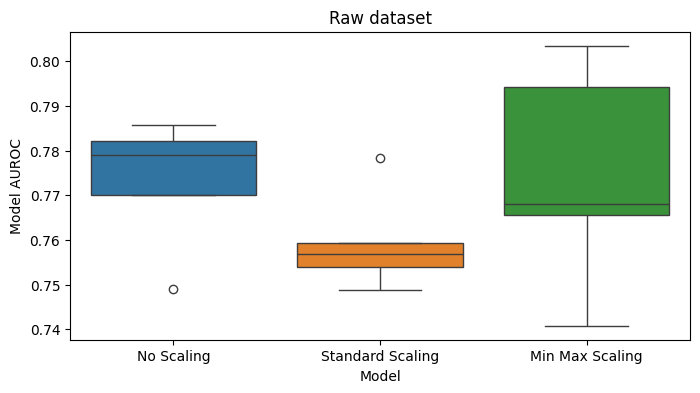

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(8,4))
ax = sns.boxplot(data=boxPlotDf, x='Scaling', y='AUROC Scores', hue='Scaling')
ax.set(xticklabels=['No Scaling', 'Standard Scaling', 'Min Max Scaling'])
ax.set(xlabel='Model')
ax.set(ylabel='Model AUROC')
ax.set_title('Raw dataset')
plt.show()